In [110]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [111]:
# Read the CSV file
#df = pd.read_csv('confusion.csv')
# Calculate the confusion matrix
#confusion = confusion_matrix(df['True'], df['Predicted'])

In [112]:
# Plot the confusion matrix
#plt.figure(figsize=(20, 14))
#sns.heatmap(confusion, annot=True, fmt="d", cmap='Blues')
#plt.title('Confusion Matrix')
#plt.ylabel('True label')
#plt.xlabel('Predicted label')
#plt.show()

In [113]:
def train_val_plot(pathTrain, pathVal, title, stat):
    # Read the CSV file
    dfVal = pd.read_csv(pathVal)
    dfTrain = pd.read_csv(pathTrain)

    plt.figure(figsize=(6, 5))
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel(stat)
    plt.plot(dfVal, label='Validation ' + stat)
    plt.plot(dfTrain, label='Training ' + stat)
    plt.legend(ncol=4, bbox_to_anchor=(0.5,-0.5), loc='lower center', edgecolor='w')
    plt.tight_layout()
    plt.savefig(f"{title} - {stat}.png")
    plt.show()

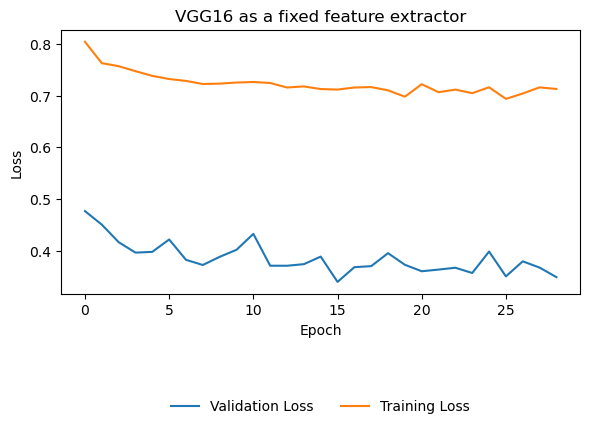

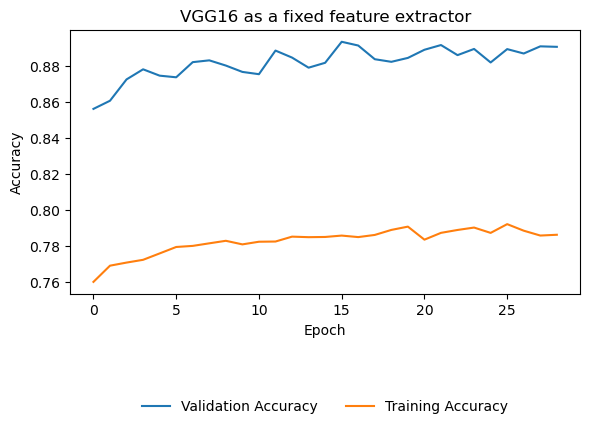

In [114]:
train_val_plot('../scripts/last_layer/train_loss_history.csv', '../scripts/last_layer/val_loss_history.csv', 'VGG16 as a fixed feature extractor', 'Loss')
train_val_plot('../scripts/last_layer/train_acc_history.csv', '../scripts/last_layer/val_acc_history.csv', 'VGG16 as a fixed feature extractor', 'Accuracy')

In [115]:
train_val_plot('../scripts/fine_tuning/train_loss_history.csv', '../scripts/fine_tuning/val_loss_history.csv', 'VGG16 fine-tuned', 'Loss')
train_val_plot('../scripts/fine_tuning/train_acc_history.csv', '../scripts/fine_tuning/val_acc_history.csv', 'VGG16 fine-tuned ', 'Accuracy')

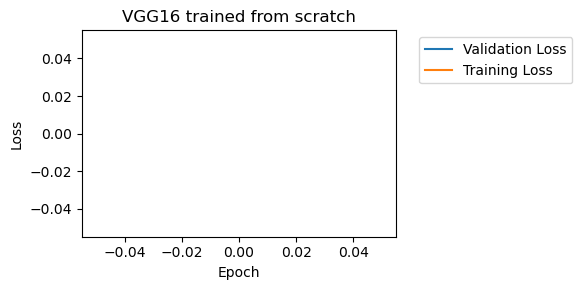

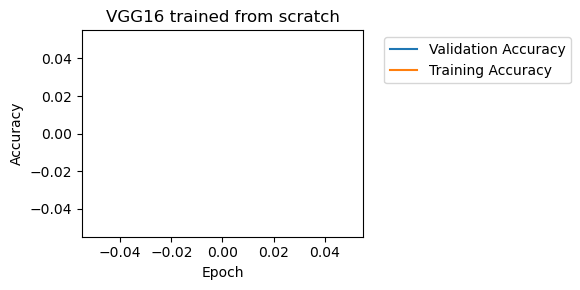

In [ ]:
train_val_plot('../scripts/from_scratch/train_loss_history.csv', '../scripts/from_scratch/val_loss_history.csv', 'VGG16 trained from scratch', 'Loss')
train_val_plot('../scripts/from_scratch/train_acc_history.csv', '../scripts/from_scratch/val_acc_history.csv', 'VGG16 trained from scratch', 'Accuracy')